In [1]:
!pip install kaggle

In [2]:
# configuring thr path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The data is Exreacted')

The data is Exreacted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[:5])
print(with_mask_file[-5:])

['with_mask_1793.jpg', 'with_mask_2638.jpg', 'with_mask_3534.jpg', 'with_mask_133.jpg', 'with_mask_1617.jpg']
['with_mask_1674.jpg', 'with_mask_3597.jpg', 'with_mask_799.jpg', 'with_mask_3286.jpg', 'with_mask_1491.jpg']


In [8]:
without_mask_file = os.listdir('/content/data/without_mask')
print(without_mask_file[:5])
print(without_mask_file[-5:])

['without_mask_121.jpg', 'without_mask_301.jpg', 'without_mask_3122.jpg', 'without_mask_3316.jpg', 'without_mask_2878.jpg']
['without_mask_3129.jpg', 'without_mask_3641.jpg', 'without_mask_2139.jpg', 'without_mask_174.jpg', 'without_mask_1651.jpg']


In [9]:
print(f'Number of with mask images {len(with_mask_file)}')
print(f'Number of withOut mask images {len(without_mask_file)}')

Number of with mask images 3725
Number of withOut mask images 3828


Creating Labels for the two class of Images

with mask ----> 1

without mask ----> 0

In [10]:
# create the labels

with_mask_labels = [1]*len(with_mask_file)

without_mask_labels = [0]*len(without_mask_file)


In [11]:
print(with_mask_labels[:5])

print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
labels = with_mask_labels + without_mask_labels

print(np.unique(labels))
print(len(labels))

[0 1]
7553


Displaying the Images

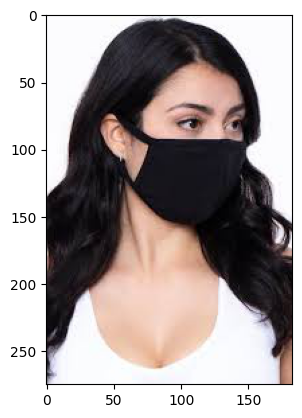

In [13]:
# Displaying with mask image

image = mpimg.imread('/content/data/with_mask/with_mask_1431.jpg')
imgplot = plt.imshow(image)
plt.show()

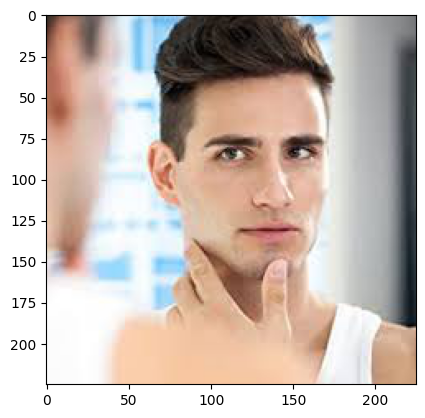

In [14]:
# Displaying without mask image

img= mpimg.imread('/content/data/without_mask/without_mask_2583.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing

  1. Resize the images
  2. Converting the images to numpy arrays

In [15]:
# convert images to numpy arrays


with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_file:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_file:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
data[0]

array([[[251, 251, 251],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [253, 253, 253],
        [250, 250, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [249, 249, 249],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[235, 233, 246],
        [235, 233, 246],
        [236, 234, 247],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[233, 231, 245],
        [233, 231, 245],
        [235, 232, 246],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[231, 228, 245],
        [231, 228, 245],
        [233, 230, 247],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# Converting image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# scaling the data

X_tarin_scaled = X_train / 255

X_test_scaled = X_test / 255

In [29]:
X_tarin_scaled[0]

array([[[0.09411765, 0.05490196, 0.0627451 ],
        [0.08627451, 0.05490196, 0.05882353],
        [0.08627451, 0.0627451 , 0.0627451 ],
        ...,
        [0.15294118, 0.11372549, 0.10588235],
        [0.12941176, 0.09803922, 0.09019608],
        [0.17647059, 0.14117647, 0.14117647]],

       [[0.09411765, 0.07058824, 0.06666667],
        [0.08627451, 0.06666667, 0.0627451 ],
        [0.0745098 , 0.06666667, 0.05882353],
        ...,
        [0.13333333, 0.09411765, 0.07843137],
        [0.13333333, 0.10196078, 0.09019608],
        [0.1372549 , 0.10588235, 0.09803922]],

       [[0.07843137, 0.08235294, 0.0627451 ],
        [0.0745098 , 0.07843137, 0.0627451 ],
        [0.0627451 , 0.06666667, 0.05490196],
        ...,
        [0.12156863, 0.08627451, 0.06666667],
        [0.12941176, 0.10196078, 0.07843137],
        [0.12941176, 0.09803922, 0.08235294]],

       ...,

       [[0.63529412, 0.6745098 , 0.65490196],
        [0.60392157, 0.64313725, 0.61960784],
        [0.75686275, 0

Building a Convolutional Neural Network (CNN)

In [30]:
import tensorflow as tf
from tensorflow import keras


In [31]:
num_of_class = 2

model = keras.Sequential([


                          # Step 1: Add CNN Layer
                          keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
                          keras.layers.MaxPool2D(pool_size=(2,2)),

                          keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                          keras.layers.MaxPool2D(pool_size=(2,2)),


                          # Step 2: Create ANN
                          keras.layers.Flatten(),

                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(0.5),

                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dropout(0.5),

                          keras.layers.Dense(num_of_class, activation='sigmoid')

])

In [32]:
#Complie the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
# training the neural network
history = model.fit(X_tarin_scaled, Y_train, validation_split=0.1, epochs=5 )

Epoch 1/5
170/170 [==============================] - 8s 24ms/step - loss: 0.4859 - accuracy: 0.7979 - val_loss: 0.3056 - val_accuracy: 0.8628
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2990 - accuracy: 0.8801 - val_loss: 0.2495 - val_accuracy: 0.8975
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2433 - accuracy: 0.9022 - val_loss: 0.2367 - val_accuracy: 0.9074
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2076 - accuracy: 0.9185 - val_loss: 0.2221 - val_accuracy: 0.9157
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1722 - accuracy: 0.9340 - val_loss: 0.2437 - val_accuracy: 0.9041


Model Evaluation

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =',accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2233 - accuracy: 0.9060
Test Accuracy = 0.9060224890708923


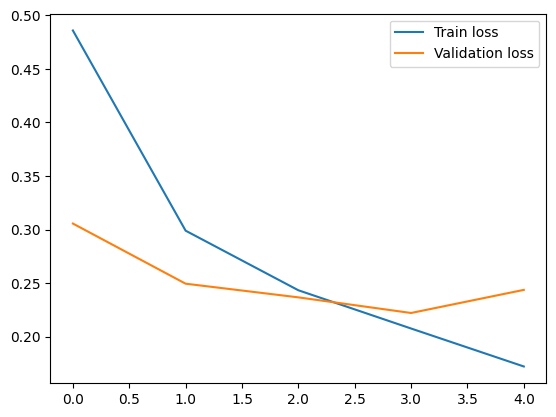

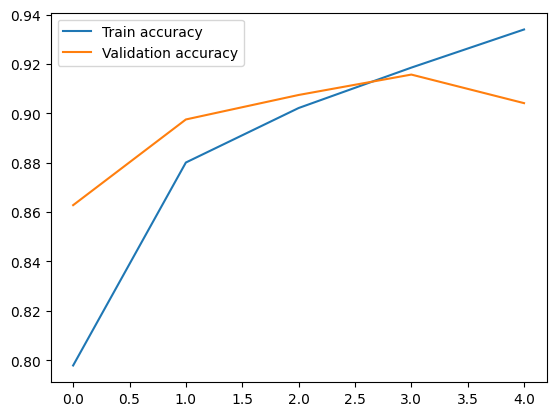

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='Train loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['accuracy'], label='Train accuracy')
plt.plot(h.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predict:/content/data/with_mask/with_mask_1006.jpg


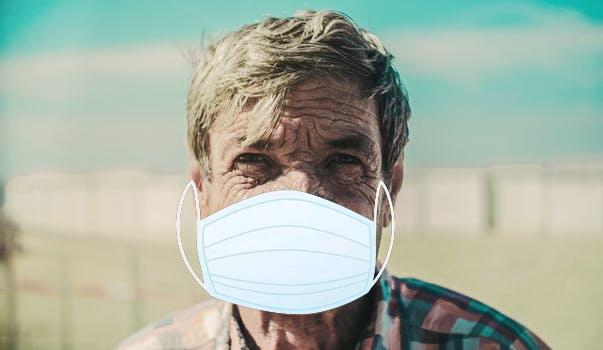

1/1 [==============================] - 0s 170ms/step
[[0.0933119  0.72243005]]
The person is the image is wering a mask


In [36]:
input_image_path = input('Path of the image to be predict:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize / 255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:

  print('The person is the image is wering a mask')

else:

    print('The person is the image is not wering a mask')

